In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import tinyDA as tda

In [2]:
b = 1
m = 2
x = np.linspace(0,1)
y_pure = b + m*x

sigma = 0.1
y = y_pure + np.random.normal(scale=sigma, size=x.shape[0])

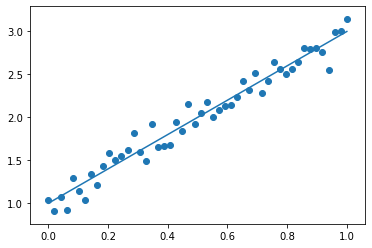

In [3]:
plt.plot(x, y_pure)
plt.scatter(x, y)
plt.show()

In [4]:
mean_prior = np.zeros(2)
cov_prior = np.eye(2)
cov_likelihood = sigma**2*np.eye(x.shape[0])

my_prior = multivariate_normal(mean_prior, cov_prior)
my_loglike = tda.LogLike(y, cov_likelihood)

In [5]:
class MyLinkFactory(tda.LinkFactory):
    def evaluate_model(self, parameters):
        output = parameters[0] + parameters[1]*x
        qoi = None
        return output, qoi

In [6]:
my_link_factory = MyLinkFactory(my_prior, my_loglike)

In [7]:
#rwmh_cov = np.eye(2)
#rmwh_scaling = 0.1
#rwmh_adaptive = True
#my_kernel = tda.GaussianRandomWalk(C=rwmh_cov, scaling=rmwh_scaling, adaptive=rwmh_adaptive)

pcn_scaling = 0.1
pcn_adaptive = False
my_kernel = tda.CrankNicolson(scaling=pcn_scaling, adaptive=pcn_adaptive)

#am_cov = np.eye(2)
#am_t0 = 2000
#am_sd = 1
#am_epsilon = 1e-6
#my_kernel = tda.AdaptiveMetropolis(C0=am_cov, t0=am_t0, sd=am_sd, epsilon=am_epsilon)

my_proposal = tda.MultipleTry(my_kernel, 3)

2022-03-09 12:25:02,961	INFO services.py:1172 -- View the Ray dashboard at http://127.0.0.1:8265


In [8]:
my_chain = tda.Chain(my_link_factory, my_proposal)

In [9]:
my_chain.sample(12000)

Running chain, α = 0.15:   0%|          | 27/12000 [00:01<1:32:17,  2.16it/s]/home/mikkel/.local/lib/python3.8/site-packages/tinyDA/ray.py:126: RuntimeWarning: overflow encountered in exp
  return np.exp(logsumexp(self.proposal_weights) - logsumexp(self.reference_weights))
Running chain, α = 0.69: 100%|██████████| 12000/12000 [01:27<00:00, 136.97it/s]


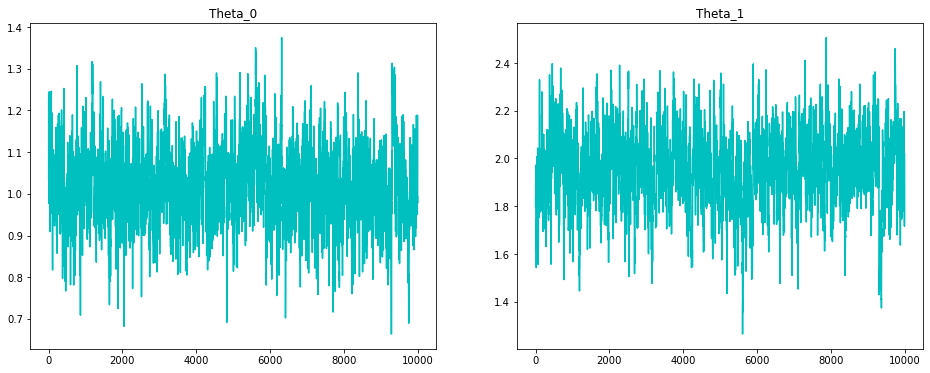

In [10]:
burnin = 2000
parameters = tda.get_parameters(my_chain, burnin=burnin)
tda.plot_parameters(parameters)